# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle as pkl

# TODO: Fill this in based on where you saved the training and testing data

train_file = "./data/train.p"
valid_file = "./data/valid.p"
test_file = "./data/test.p"

with open( train_file, mode='rb' ) as f:
    train = pkl.load( f )
with open( valid_file, mode='rb' ) as f:
    valid = pkl.load( f )
with open( test_file, mode='rb' ) as f:
    test = pkl.load( f )
    
x_train, y_train = train[ 'features' ], train[ 'labels' ]
x_valid, y_valid = valid[ 'features' ], valid[ 'labels' ]
x_test, y_test = test[ 'features' ], test[ 'labels' ]

print( "X_train shape:\t", x_train.shape )
print( "y_train shape:\t", y_train.shape )
print( "X_valid shape:\t", x_valid.shape )
print( "y_valid shape:\t", y_valid.shape )
print( "X_test shape:\t", x_test.shape )
print( "y_test shape:\t", y_test.shape )

X_train shape:	 (34799, 32, 32, 3)
y_train shape:	 (34799,)
X_valid shape:	 (4410, 32, 32, 3)
y_valid shape:	 (4410,)
X_test shape:	 (12630, 32, 32, 3)
y_test shape:	 (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len( x_train )

# TODO: Number of validation examples
n_valid = len( x_valid )

# TODO: Number of testing examples.
n_test = len( x_test )

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len( np.unique( y_train ) )

print( "Number of training examples:\t", n_train )
print( "Number of validation examples:\t", n_train )
print( "Number of testing examples:\t", n_test )
print( "Image data shape:\t\t", image_shape )
print( "Number of classes:\t\t", n_classes )

Number of training examples:	 34799
Number of validation examples:	 34799
Number of testing examples:	 12630
Image data shape:		 (32, 32, 3)
Number of classes:		 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

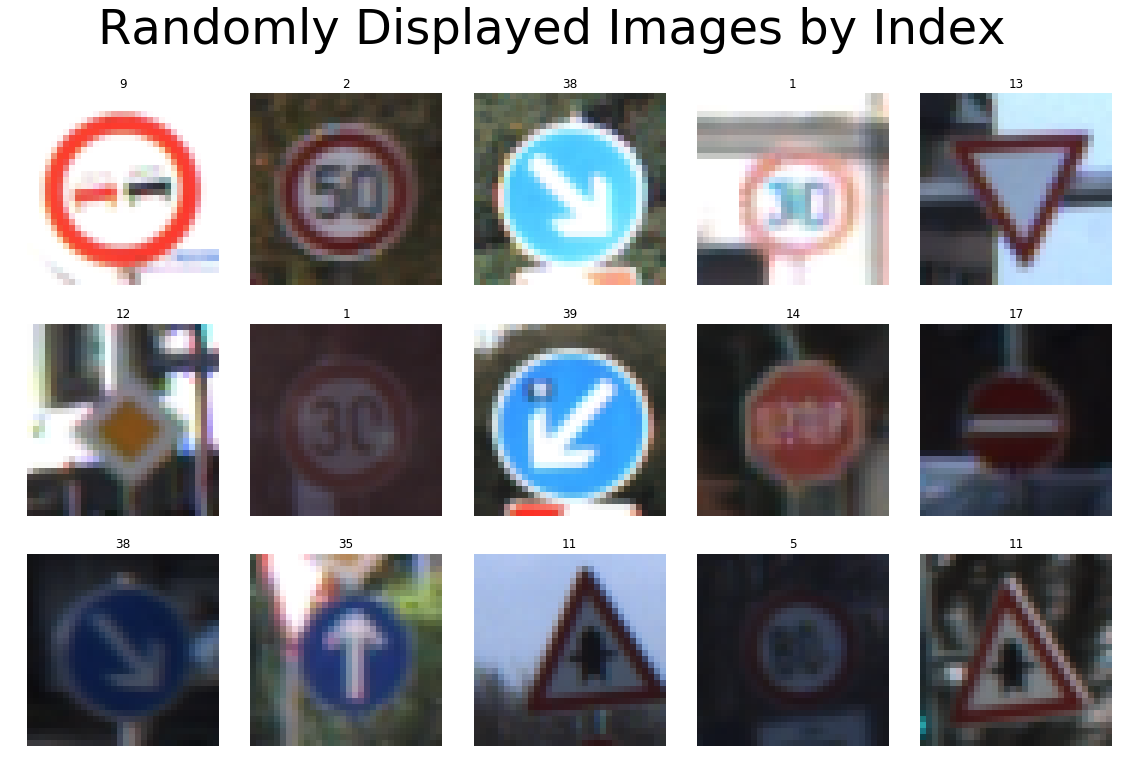

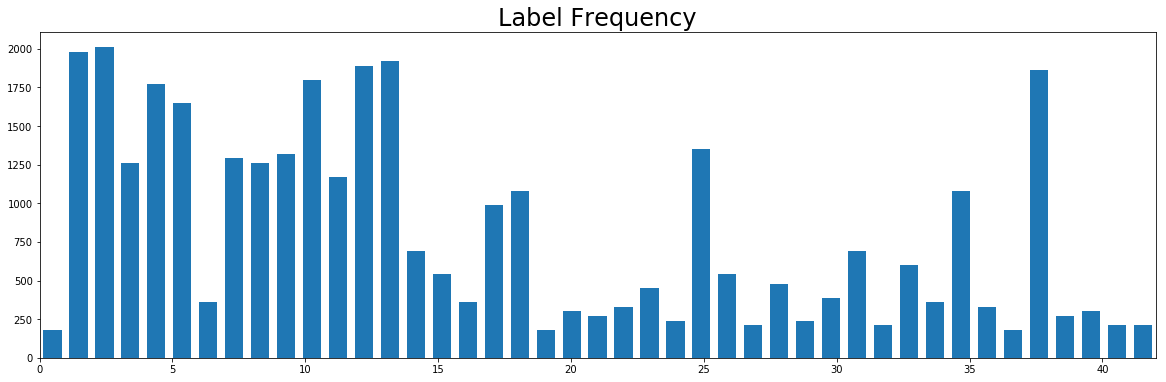

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random as rand
# Visualizations will be shown in the notebook.
%matplotlib inline

# Select 15 random data points and show image
print( '\n' )
fig, axs = plt.subplots( 3, 5, figsize=( 20, 12 ) )
fig.suptitle( "Randomly Displayed Images by Index", fontsize=48, verticalalignment='top' ) 
fig.subplots_adjust( hspace = .2, wspace=.002 )
axs = axs.ravel( )

for i in range( 15 ):
    index = rand.randint( 0, len( x_train ) )
    image = x_train[ index ]
    axs[i].axis( 'off' )
    axs[i].set_title( y_train[ index ] )
    axs[i].imshow( image )

plt.savefig( "./res/output_images/1_random_images.jpg" )
plt.show( )
    
# Plot histogram of label frequency
print( '\n' )
histo, bins = np.histogram( y_train, bins=n_classes )
center = ( bins[:-1] + bins[1:] ) / 2
width = 0.7 * ( bins[1] - bins[0] )

plt.figure( figsize=(20, 6) )
plt.bar( center, histo, align='center', width=width )
plt.xlim( 0, np.max( y_train[:] ) )
plt.title( "Label Frequency", fontsize=24 )
plt.savefig( "./res/output_images/2_label_frequency.jpg" )
plt.show( )

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)




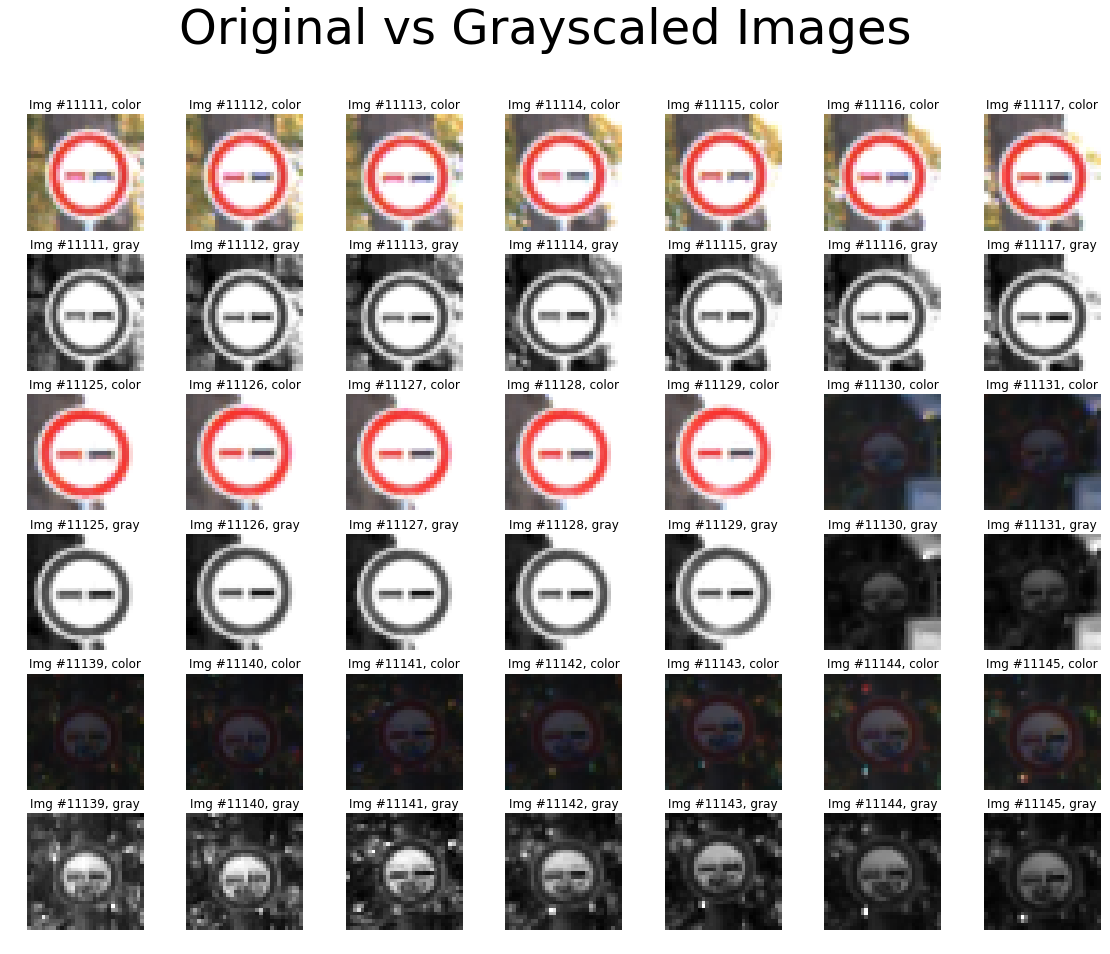

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Convert to grayscale
x_train_gry = np.sum( x_train / 3, axis=3, keepdims=True )

x_valid_gry = np.sum( x_valid / 3, axis=3, keepdims=True )

x_test_gry = np.sum( x_test / 3, axis=3, keepdims=True )

print( 'RGB shape:', x_train.shape )
print( 'Grayscale shape:', x_train_gry.shape )
print( '\n' )

n_rows, n_cols, offset = 6, 7, 11111

fig, axs = plt.subplots( n_rows, n_cols, figsize=( 20, 15 ) )
fig.suptitle( "Original vs Grayscaled Images", fontsize=48, verticalalignment='top' ) 
fig.subplots_adjust( hspace=.2, wspace=.002 )
axs = axs.ravel( )

for j in range( 0, n_rows, 2 ):
    
    for i in range( n_cols ):
        index = i + j * n_cols
        image = x_train[ index + offset ]
        axs[ index ].axis( 'off' )
        axs[ index ].imshow( image )
        axs[ index ].set_title( 'Img #' + str( index + offset ) + ', color' )
        
    for i in range( n_cols ):
        index = i + j * n_cols + n_cols 
        image = x_train_gry[ index + offset - n_cols ].squeeze( )
        axs[ index ].axis( 'off' )
        axs[ index ].imshow( image, cmap='gray' )
        axs[ index ].set_title( 'Img #' + str( index + offset - n_cols ) + ', gray' )
        
plt.savefig( "./res/output_images/3_grayscaled.jpg" )
plt.show( )
        
del n_rows, n_cols, offset

Mean of training set:			 82.678
Mean of validation set:			 83.556
Mean of testing set:			 82.148
 *   *   * 
Mean of normalized training set:	 -0.354
Mean of normalized validation set:	 -0.347
Mean of normalized testing set: 	 -0.358
 *   *   * 
Original shape:				 (34799, 32, 32, 1)
Normalized shape:			 (34799, 32, 32, 1)




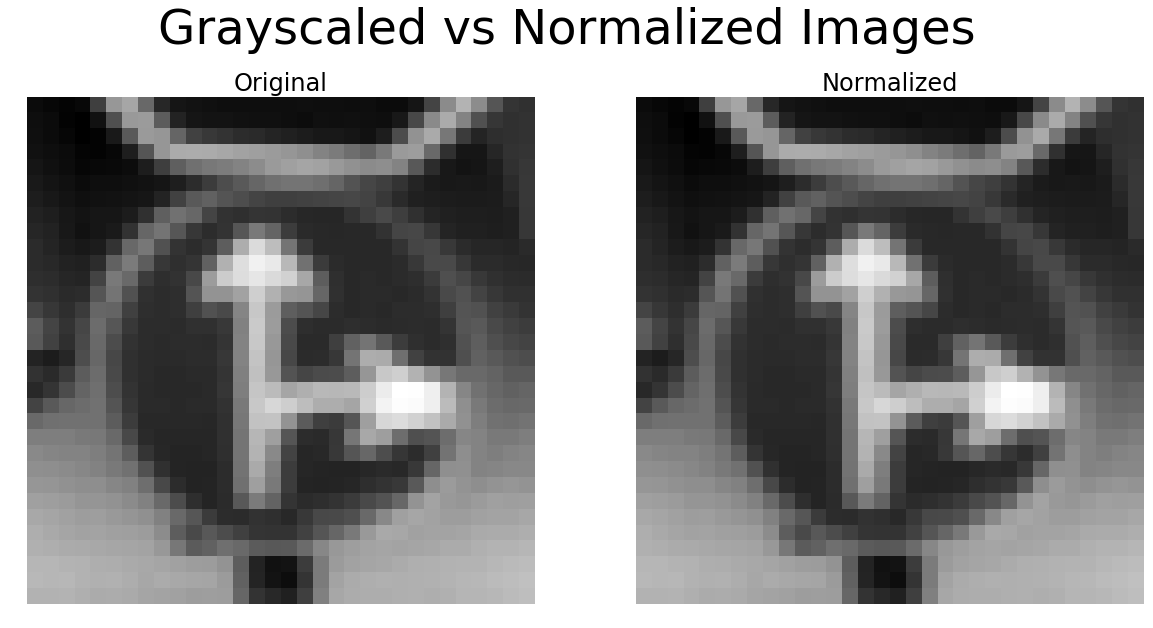

In [13]:
## Normalize the training, validation, and testing datasets to (-1,1)

x_train_nrml = ( x_train_gry - 128 ) / 128 
x_valid_nrml = ( x_valid_gry - 128 ) / 128 
x_test_nrml = ( x_test_gry - 128 ) / 128

print( "Mean of training set:\t\t\t", "{0:.3f}".format( np.mean( x_train_gry ) ) )
print( "Mean of validation set:\t\t\t", "{0:.3f}".format( np.mean( x_valid_gry ) ) )
print( "Mean of testing set:\t\t\t", "{0:.3f}".format( np.mean( x_test_gry ) ) )

print( " *   *   * ")

print( "Mean of normalized training set:\t", "{0:.3f}".format( np.mean( x_train_nrml ) ) ) 
print( "Mean of normalized validation set:\t", "{0:.3f}".format( np.mean( x_valid_nrml ) ) )
print( "Mean of normalized testing set: \t", "{0:.3f}".format( np.mean( x_test_nrml ) ) )

print( " *   *   * ")

print( "Original shape:\t\t\t\t", x_train_gry.shape )
print( "Normalized shape:\t\t\t", x_train_nrml.shape )

print( '\n' )
fig, axs = plt.subplots( 1, 2, figsize=( 20, 10 ) )
fig.suptitle( "Grayscaled vs Normalized Images", fontsize=48, verticalalignment='top' ) 
axs = axs.ravel( )

axs[0].axis( 'off' )
axs[0].set_title( 'Original', fontsize=24 )
axs[0].imshow( x_train_gry[1101].squeeze( ), cmap='gray' )

axs[1].axis( 'off' )
axs[1].set_title( 'Normalized', fontsize=24 )
axs[1].imshow( x_train_nrml[1101].squeeze( ), cmap='gray' ) 

plt.savefig( "./res/output_images/4_normalized.jpg" )
plt.show( )

Lastly, the training data should be shuffled.

In [14]:
from sklearn.utils import shuffle as shuffle

x_train, y_train = shuffle( x_train_nrml, y_train )

### Original LeNet Model Architecture

![LeNet Architecture](./res/lenet_1.png)

Source: Yan LeCun

The training data is preformatted to receive 32x32xC images.

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten as flatten


def lenet_0( x ):    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    c_1_W = tf.Variable( tf.truncated_normal( shape=( 5, 5, 1, 6 ), mean=mu, stddev=sigma ) )
    c_1_b = tf.Variable( tf.zeros( 6 ) )
    c_1 = tf.nn.conv2d( x, c_1_W, strides=[1, 1, 1, 1], padding='VALID' ) + c_1_b

    # Activation and cleanup.
    c_1 = tf.nn.relu( c_1 )
    del c_1_W, c_1_b

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    p_1 = tf.nn.max_pool( c_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID' )

    # Layer 2: Convolutional. Output = 10x10x16.
    c_2_W = tf.Variable( tf.truncated_normal( shape=( 5, 5, 6, 16 ), mean=mu, stddev=sigma ) )
    c_2_b = tf.Variable( tf.zeros( 16 ) )
    c_2 = tf.nn.conv2d( p_1, c_2_W, strides=[1, 1, 1, 1], padding='VALID' ) + c_2_b
    
    # Activation and cleanup.
    c_2 = tf.nn.relu( c_2 )
    del c_1, p_1, c_2_W, c_2_b

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    p_2 = tf.nn.max_pool( c_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID' )

    # Flatten. Input = 5x5x16. Output = 400.
    fc_0 = flatten( p_2 )
    del c_2, p_2
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_1_W = tf.Variable( tf.truncated_normal( shape=( 400, 120 ), mean=mu, stddev=sigma ) )
    fc_1_b = tf.Variable( tf.zeros( 120 ) )
    fc_1 = tf.matmul( fc_0, fc_1_W ) + fc_1_b
    
    # Activation and cleanup.
    fc_1 = tf.nn.relu( fc_1 )
    del fc_0, fc_1_W, fc_1_b

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_2_W = tf.Variable( tf.truncated_normal( shape=( 120, 84 ), mean=mu, stddev=sigma ) )
    fc_2_b = tf.Variable( tf.zeros( 84 ) )
    fc_2 = tf.matmul( fc_1, fc_2_W ) + fc_2_b
    
    # Activation and cleanup.
    fc_2 = tf.nn.relu( fc_2 )
    del fc_1, fc_2_W, fc_2_b

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc_3_W = tf.Variable( tf.truncated_normal( shape=( 84, 10 ), mean=mu, stddev=sigma ) )
    fc_3_b = tf.Variable( tf.zeros( 10 ) )
    logits = tf.matmul( fc_2, fc_3_W ) + fc_3_b
    
    return logits

### Modified LeNet Model Architecture

![LeNet Architecture](./res/lenet_2.jpeg)

Source: Sermanet, LeCun

The training data is preformatted to receive 32x32xC images.

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def lenet_1( x, debug='no' ):    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    c_1_w = tf.Variable( tf.truncated_normal( shape=( 5, 5, 1, 6 ), mean=mu, stddev=sigma ) )
    c_1_b = tf.Variable( tf.zeros( 6 ) )
    c_1 = tf.nn.bias_add( tf.nn.conv2d( x, c_1_w, strides=[1, 1, 1, 1], padding='VALID' ), c_1_b )
    c_1_shape = c_1.get_shape( )

    # Activation and cleanup.
    c_1 = tf.nn.relu( c_1 )
    del x, c_1_w, c_1_b

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    p_1 = tf.nn.max_pool( c_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID' )
    p_1_shape = p_1.get_shape( )

    # Layer 2: Convolutional. Output = 10x10x16.
    c_2_w = tf.Variable( tf.truncated_normal( shape=( 5, 5, 6, 16 ), mean=mu, stddev=sigma ) )
    c_2_b = tf.Variable( tf.zeros( 16 ) )
    c_2 = tf.nn.bias_add( tf.nn.conv2d( p_1, c_2_w, strides=[1, 1, 1, 1], padding='VALID' ), c_2_b )
    c_2_shape = c_2.get_shape( )
    
    # Activation and cleanup.
    c_2 = tf.nn.relu( c_2 )
    del c_1, c_2_w, c_2_b

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    p_2 = tf.nn.max_pool( c_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID' )
    p_2_shape = p_2.get_shape( )

    # Layer 3: Convolutional. Output = 1x1x400.
    c_3_w = tf.Variable( tf.truncated_normal( shape=( 5, 5, 16, 400 ), mean=mu, stddev=sigma ) )
    c_3_b = tf.Variable( tf.zeros( 400 ) )
    c_3 = tf.nn.bias_add( tf.nn.conv2d( p_2, c_3_w, strides=[1, 1, 1, 1], padding='VALID' ), c_3_b )
    c_3_shape = c_3.get_shape( )
                     
    # Activation and cleanup.
    c_3 = tf.nn.relu( c_3 )
    del c_2, c_3_w, c_3_b
    
    # Concatenate flattened layers 2 and 3. Input = (5x5x16=400) + (1x1x400=400). Output = 800.
    combined_layers = tf.concat( [ flatten( c_3 ), flatten( p_2 ) ], 1 )
    combined_shape = combined_layers.get_shape( )
    
    # Dropout and cleanup.
    x = tf.nn.dropout( combined_layers, keep_prob )
    del p_2, c_3, combined_layers
    
    # Layer 4: Fully Connected. Input = 800. Output = 120.
    fc_1_W = tf.Variable( tf.truncated_normal( shape=( 800, 120 ), mean=mu, stddev=sigma ) )
    fc_1_b = tf.Variable( tf.zeros( 120 ) )
    fc_1 = tf.add( tf.matmul( x, fc_1_W ), fc_1_b )
    
    # Activation and cleanup.
    fc_1 = tf.nn.relu( fc_1 )
    fc_1 = tf.nn.dropout( fc_1, keep_prob )
    del fc_1_W, fc_1_b

    # Layer 4: Fully Connected. Input = 120. Output = 43.
    fc_2_W = tf.Variable( tf.truncated_normal( shape=( 120, 43 ), mean=mu, stddev=sigma ) )
    fc_2_b = tf.Variable( tf.zeros( 43 ) )
    fc_2 = tf.add( tf.matmul( fc_1, fc_2_W ), fc_2_b )

    if debug == 'yes' or debug == 'YES':
        print( "Convolutional Layer 1 shape:\t", c_1_shape )
        print( "Pooling Layer 1 shape:\t\t", p_1_shape )
        print( "Convolutional Layer 2 shape:\t", c_2_shape )
        print( "Pooling Layer 2 shape:\t\t", p_2_shape )
        print( "Convolutional Layer 3 shape:\t", c_3_shape )
        print( "Concatenated Layers shape:\t", combined_shape )
    
    return fc_2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [158]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph( )

EPOCHS = 101
BATCH_SIZE = 128

x = tf.placeholder( tf.float32, ( None, 32, 32, 1 ) )
y = tf.placeholder( tf.int32, ( None ) )

keep_prob = tf.placeholder( tf.float32 ) # probability to keep units
one_hot_y = tf.one_hot( y, 43 )

learn_rate = 0.00069

debug = None

if debug:
    print( "Debug LeNet:" )
    x_lenet_test = tf.placeholder( tf.float32, ( None, 32, 32, 1 ) )
    test_logits = lenet_1( x_lenet_test, 'yes' )

logits = lenet_1( x, 'no' )

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=one_hot_y, logits=logits )

loss_operation = tf.reduce_mean( cross_entropy )

optimizer = tf.train.AdamOptimizer( learning_rate=learn_rate )

training_operation = optimizer.minimize( loss_operation )

#### Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [151]:
correct_prediction = tf.equal( tf.argmax( logits, 1 ), tf.argmax( one_hot_y, 1 ) )

accuracy_operation = tf.reduce_mean( tf.cast( correct_prediction, tf.float32 ) )

saver = tf.train.Saver( )

def evaluate( X_data, y_data, sess=None ):
    num_examples = len( X_data )
    
    total_accuracy = 0
    
    if not sess:
        sess = tf.get_default_session( )
    
    for offset in range( 0, num_examples, BATCH_SIZE ):
        
        batch_x = X_data[ offset:offset + BATCH_SIZE ]
        batch_y = y_data[ offset:offset + BATCH_SIZE ]
        
        accuracy = sess.run( accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0} )
        
        total_accuracy += ( accuracy * len( batch_x ) )
    
    return total_accuracy / num_examples

### 

#### Train the Model

Run the training data through the training pipeline to train the model.  Before each epoch, shuffle the training set.  After each epoch, measure the loss and accuracy of the validation set.  Save the model after training.

Training...


EPOCH 0:	  Validation Accuracy = 72.0 %
EPOCH 5:	  Validation Accuracy = 92.7 %
EPOCH 10:	  Validation Accuracy = 94.9 %
EPOCH 15:	  Validation Accuracy = 94.5 %
EPOCH 20:	  Validation Accuracy = 95.5 %
EPOCH 25:	  Validation Accuracy = 95.8 %
EPOCH 30:	  Validation Accuracy = 95.8 %
EPOCH 35:	  Validation Accuracy = 95.5 %
EPOCH 40:	  Validation Accuracy = 96.0 %
EPOCH 45:	  Validation Accuracy = 95.3 %
EPOCH 50:	  Validation Accuracy = 96.3 %
EPOCH 55:	  Validation Accuracy = 96.4 %
EPOCH 60:	  Validation Accuracy = 96.3 %
EPOCH 65:	  Validation Accuracy = 96.7 %
EPOCH 70:	  Validation Accuracy = 96.7 %
EPOCH 75:	  Validation Accuracy = 96.7 %
EPOCH 80:	  Validation Accuracy = 96.8 %
EPOCH 85:	  Validation Accuracy = 96.9 %
EPOCH 90:	  Validation Accuracy = 96.8 %
EPOCH 95:	  Validation Accuracy = 96.8 %
EPOCH 100:	  Validation Accuracy = 97.0 %
EPOCH 100:	  Validation Accuracy = 97.0 %


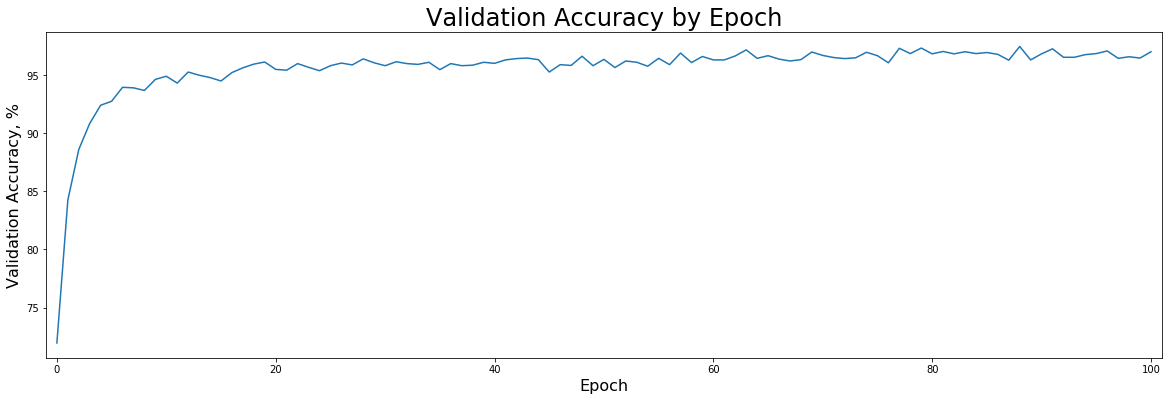

Model saved.


In [152]:
with tf.Session( ) as sess:
    sess.run( tf.global_variables_initializer( ) )
    
    num_examples = len( x_train )
    
    val_score = [ ]
    
    print( "Training..." )
    print( )
    
    for i in range( EPOCHS ):
        
        x_train, y_train = shuffle( x_train, y_train )
        
        prob = max( ( 0.60 - ( i / 100 ), 0.40 ) )
        
        for offset in range( 0, num_examples, BATCH_SIZE ):
            
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[ offset:end ], y_train[ offset:end ]
            sess.run( training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob} )
            
        val_score.append( evaluate( x_valid_nrml, y_valid ) * 100 )
        
        if i % 5 == 0:
            print( "EPOCH {}:\t".format( i ), " Validation Accuracy = {:.1f}".format( val_score[i] ), "%" )

    print( "EPOCH {}:\t".format( i ), " Validation Accuracy = {:.1f}".format( val_score[i] ), "%" )

    plt.figure( figsize=(20, 6) )
    plt.plot( val_score )
    plt.ylabel( 'Validation Accuracy, %', fontsize=16 )
    plt.xlim( val_score[0]-1, 100 )
    plt.xlabel( 'Epoch', fontsize=16 )
    plt.xlim( -1, EPOCHS )
    plt.title( 'Validation Accuracy by Epoch', fontsize=24 )
    plt.savefig( "./res/output_images/5_validation_accuracy.jpg" )
    plt.show( )
        
    saver.save( sess, './meta/lenet' )
    print( "Model saved." )

In [153]:
# Evaluate the accuracy of the model on the test dataset
with tf.Session( ) as sess:
    
    sess.run( tf.global_variables_initializer( ) )
    
    trained = tf.train.import_meta_graph( './meta/lenet.meta' ).restore( sess, "./meta/lenet" )
    
    test_accuracy = evaluate( x_test_nrml, y_test, sess ) * 100
    
    print( "Test Set Accuracy = {:.1f}".format( test_accuracy ), "%" )

INFO:tensorflow:Restoring parameters from ./meta/lenet
Test Set Accuracy = 95.3 %


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

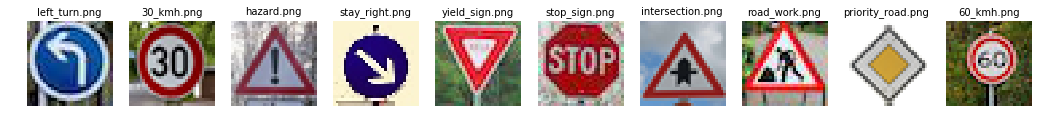

In [154]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import csv as csv
import cv2 as cv2
import glob as glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


label_names = { }

with open( './data/signnames.csv' ) as names_file:
    
    name_reader = csv.reader( names_file )
    next( name_reader )
    
    for row in name_reader:
        label_names[ int( row[0] ) ] = row[1]
        
image_names, test_images = glob.glob( './res/test_web_images/*.png' ), [ ]

fig, axes = plt.subplots( ncols=len(image_names), figsize=( 18, 9 ) )

for ax, image_name, index in zip( axes, image_names, range( len( image_names ) ) ):

    test_images.append( cv2.imread( image_name ) )
    
    ax.imshow( cv2.cvtColor( test_images[ index ], cv2.COLOR_BGR2RGB ) )
    ax.set_title( image_name[22:], fontsize=10 )
    ax.axis( 'off' )
    
plt.savefig( "./res/output_images/7_german_signs.jpg" )
plt.show( )

images = np.asarray( test_images )
    
images_gry = np.sum( images / 3, axis=3, keepdims=True )

images_nrml = ( images_gry - 128 ) / 128     

### Predict the Sign Type for Each Image

In [155]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

test_labels = [ 34, 1, 18, 38, 13, 14, 11, 25, 12, 3 ]

with tf.Session( ) as sess:
    
    sess.run( tf.global_variables_initializer( ) )
    
    test_model = tf.train.import_meta_graph( './meta/lenet.meta' ).restore( sess, "./meta/lenet" )
    
    test_accuracy = evaluate( images_nrml, test_labels, sess ) * 100
    
    softmax = sess.run( tf.nn.softmax( logits ), feed_dict={x: images_nrml, keep_prob : 1.0} )
    
    predictions = sess.run( tf.nn.top_k( softmax, k=5, sorted=True ), feed_dict={x: images_nrml, keep_prob: 1.0} )

INFO:tensorflow:Restoring parameters from ./meta/lenet


### Analyze Performance

In [156]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print( "Test Set Accuracy = {:.1f}".format( test_accuracy ), "%" )
   
for i in range( len( test_labels ) ):
    print( )
    print( "Predicted Sign", i+1, "\t", label_names[ predictions[1][i][0] ] )
    print( "Actual Sign", i+1, "  \t", label_names[ test_labels[i] ] )

Test Set Accuracy = 70.0 %

Predicted Sign 1 	 Keep right
Actual Sign 1   	 Turn left ahead

Predicted Sign 2 	 Speed limit (30km/h)
Actual Sign 2   	 Speed limit (30km/h)

Predicted Sign 3 	 General caution
Actual Sign 3   	 General caution

Predicted Sign 4 	 Keep right
Actual Sign 4   	 Keep right

Predicted Sign 5 	 Yield
Actual Sign 5   	 Yield

Predicted Sign 6 	 Speed limit (60km/h)
Actual Sign 6   	 Stop

Predicted Sign 7 	 Right-of-way at the next intersection
Actual Sign 7   	 Right-of-way at the next intersection

Predicted Sign 8 	 General caution
Actual Sign 8   	 Road work

Predicted Sign 9 	 Priority road
Actual Sign 9   	 Priority road

Predicted Sign 10 	 Speed limit (60km/h)
Actual Sign 10   	 Speed limit (60km/h)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

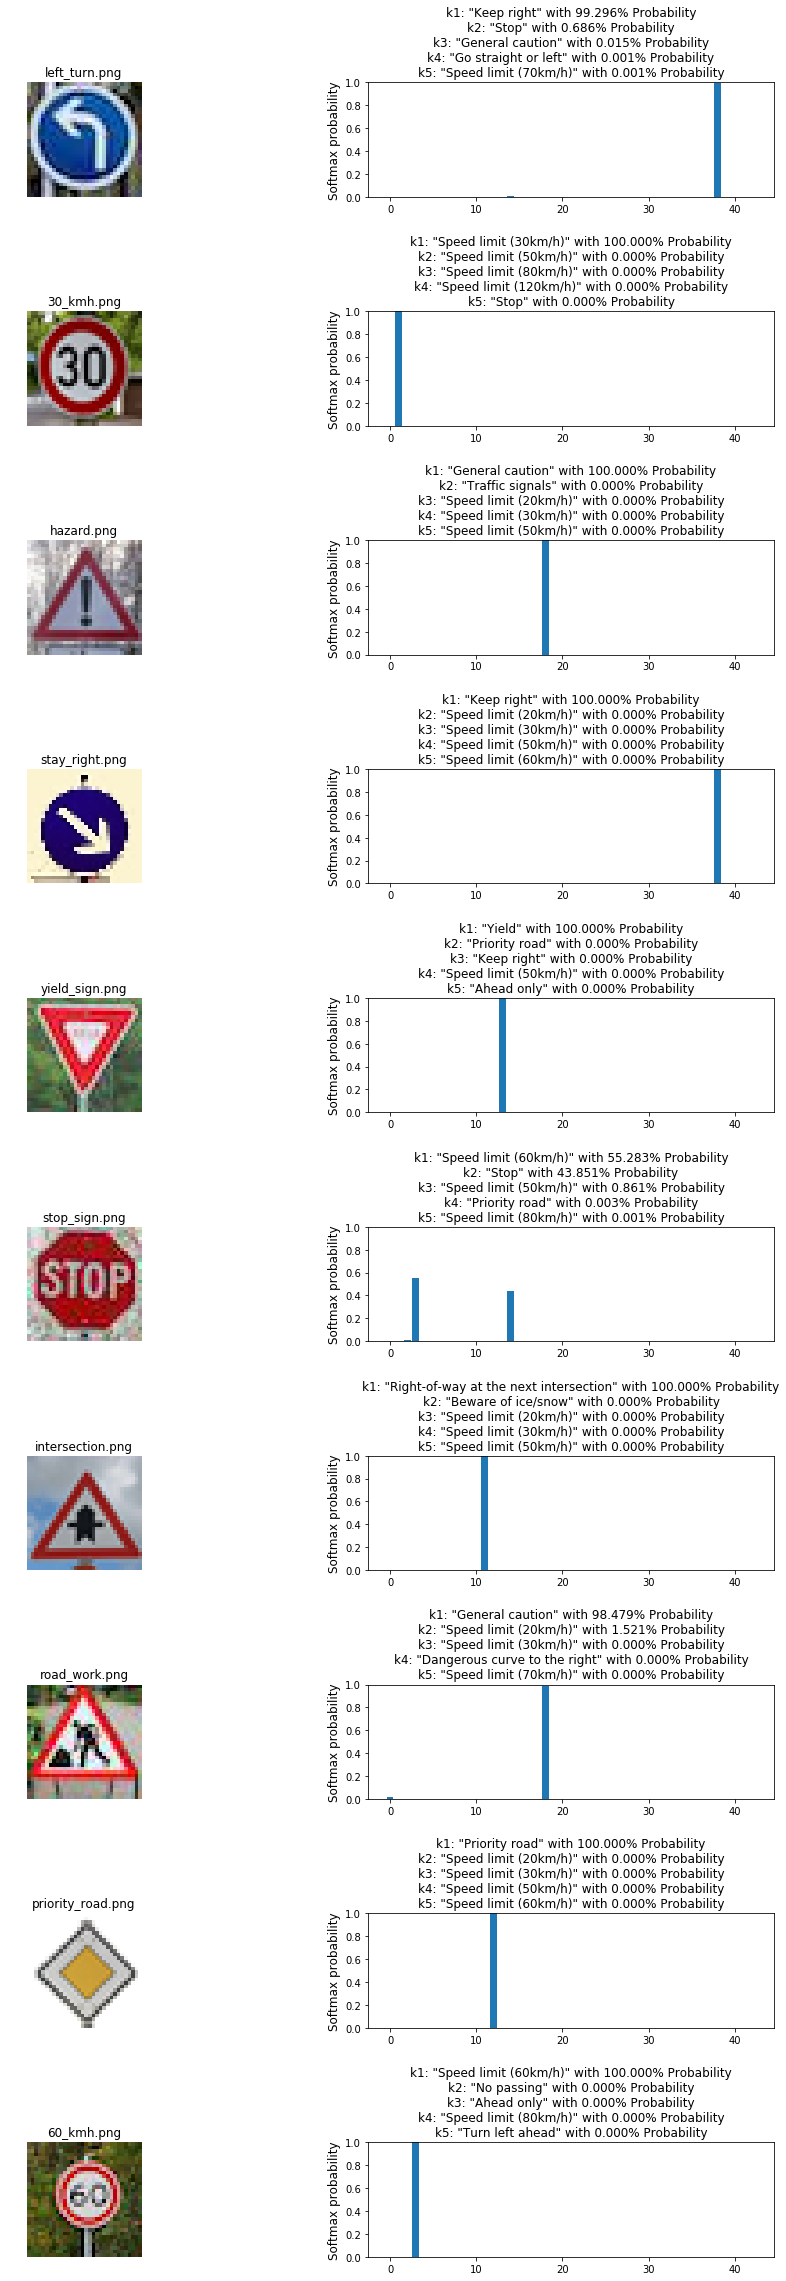

In [157]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

fig, axes = plt.subplots( 10, 2, figsize=(16, 40) )
fig.subplots_adjust( hspace=1 )
axes = axes.ravel( )

for i in range( len( test_labels ) * 2 ):
    if i % 2 == 0:
        axes[i].axis('off')
        axes[i].imshow( cv2.cvtColor( test_images[i//2], cv2.COLOR_BGR2RGB ) )
        axes[i].set_title( image_names[i//2][22:], fontsize=12 )
    else:
        strs = [ ]
        for j in range( 5 ):
            label = label_names[ predictions[1][(i-1)//2][j] ]
            prob = predictions[0][(i-1)//2][j] * 100
            strs.append( "k{}: \"{}\" with {:.3f}% Probability".format(j+1, label, prob) )

        axes[i].bar( np.arange( n_classes ), softmax[(i-1)//2] )
        axes[i].set_ylabel( "Softmax probability", fontsize=12 )
        axes[i].set_ylim(0,1)
        axes[i].set_title( "{}\n{}\n{}\n{}\n{}".format( strs[0], strs[1], strs[2], strs[3], strs[4] ) )
        
plt.savefig( "./res/output_images/8_softmax_viz.jpg" )
plt.show( )

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [159]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")